In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
from scipy import signal
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pyramids/IApppng.png
/kaggle/input/pyramids/orange.jpg
/kaggle/input/pyramids/app2.jpg
/kaggle/input/pyramids/app1.jpg
/kaggle/input/pyramids/lena.jpg


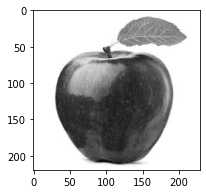

In [2]:
img1=cv2.imread('/kaggle/input/pyramids/app1.jpg',0)
#img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.imshow(img1,cmap='gray')

In [3]:
imgblru=cv2.GaussianBlur(img1,(5,5),0)

In [4]:

def upsample(img):
    kernel = (1.0/256)*np.array([[1, 4, 6, 4, 1],[4, 16, 24, 16, 4],[6, 24, 36, 24, 6],[4, 16, 24, 16, 4],[1, 4, 6, 4, 1]])
    up_image=np.zeros((img.shape[0]*2,img.shape[1]*2))
    up_image[::2,::2]=img
    return signal.convolve2d(up_image,kernel,mode='same')
def downsample(img):
    kernel = (1.0/256)*np.array([[1, 4, 6, 4, 1],[4, 16, 24, 16, 4],[6, 24, 36, 24, 6],[4, 16, 24, 16, 4],[1, 4, 6, 4, 1]])
    down_img=signal.convolve2d(img,kernel,mode='same')
    return down_img[::2,::2]

In [5]:
def GaussianPyramidsdownsample(img):
    downsamplearray=[img,]
    for i in range(4):
        dimage=downsample(downsamplearray[i])
        downsamplearray.append(dimage)
        plt.imshow(dimage,cmap='gray')
        plt.show()
    return downsamplearray

In [6]:
def GaussianPyramidsupsample(img):
    downsamplearray=[img,]
    for i in range(4):
        dimage=upsample(downsamplearray[i])
        downsamplearray.append(dimage)
        plt.imshow(dimage,cmap='gray')
        plt.show()
    return downsamplearray

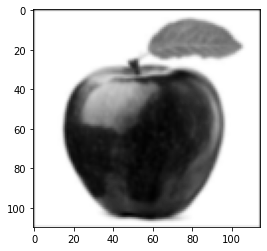

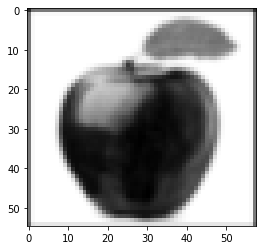

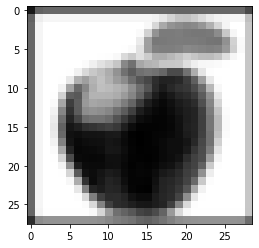

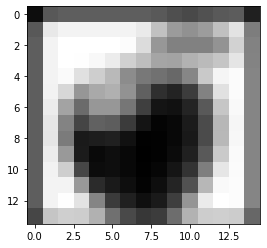

In [7]:
downsamplearray=GaussianPyramidsdownsample(imgblru)

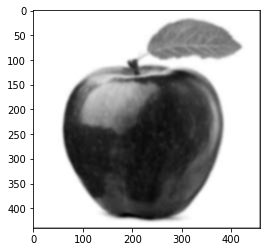

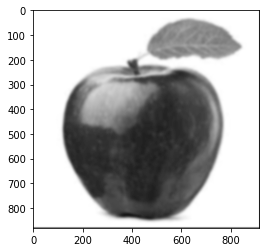

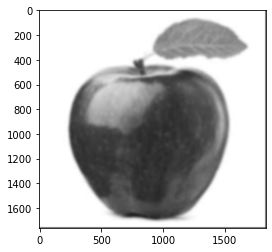

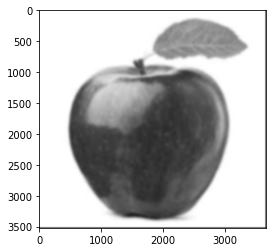

In [8]:
upsamplearray=GaussianPyramidsupsample(imgblru)